In [1]:
#Importing required packages and files
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ds_fun

#These imports were constructed

#Tools to build machine learning models and reports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

#Removes warnings and imporves asthenics
import warnings
#warnings.filterwarnings("ignore")

#Sets an option to show all columns
pd.options.display.max_columns = None
pd.options.display.width = 100
pd.options.display.max_colwidth = None
pd.options.display.max_rows = 200

Acquire:

In [2]:
wine_df = ds_fun.pour_wine()

Prepare:

In [3]:
train, val, test = ds_fun.train_validate(wine_df, random_seed=1969)

In [4]:
cont_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [5]:
train, val, test = ds_fun.scale_cont_columns(train, val, test , cont_columns, scaler_model = 1)

In [6]:
qual_class = [0,5,7,9]
qual_bins = ['low', 'med', 'high']

In [7]:
#train = pd.cut(qual_class, qual_bins)

Engineer:

In [8]:
cluster_list = [ 'density', 'volatile acidity', 'chlorides', 'alcohol']

In [9]:
cluster_list0 = [ 'density', 'volatile acidity']

In [10]:
cluster_list1 = [ 'density', 'chlorides']

In [11]:
cluster_list2 = [ 'density', 'alcohol']

In [12]:
cluster_list3 = [ 'volatile acidity', 'chlorides']

In [13]:
cluster_list4 = ['volatile acidity', 'alcohol']

In [14]:
cluster_list5 = ['chlorides', 'alcohol']

In [15]:
cluster_list6 = ['volatile acidity', 'chlorides', 'alcohol']

In [16]:
cluster_list7 = [ 'density', 'chlorides', 'alcohol']

In [17]:
cluster_list8 = [ 'density', 'volatile acidity', 'alcohol']

In [18]:
cluster_list9 = [ 'density', 'volatile acidity', 'chlorides']

In [19]:
n_clusters = 2

In [20]:
n_clusters0 = 4

In [21]:
n_clusters1 = 2

In [22]:
n_clusters2 = 2

In [23]:
n_clusters3 = 2

In [24]:
n_clusters4 = 4

In [25]:
n_clusters5 = 2

In [26]:
n_clusters6 = 4

In [27]:
n_clusters7 = 2

In [28]:
n_clusters8 = 2

In [29]:
n_clusters9 = 3

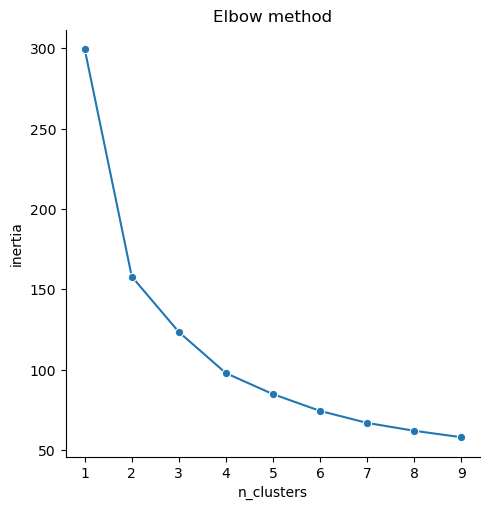

In [30]:
#ds_fun.elbow_method(train, cluster_list)

In [31]:
#Builds the cluster object with the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(train[cluster_list])

#Builds a column with the cluster numbers
train['cluster_preds'] = kmeans.predict(train[cluster_list])
val['cluster_preds'] = kmeans.predict(val[cluster_list])

In [32]:
train.drop(columns=cluster_list, inplace = True)
val.drop(columns=cluster_list, inplace = True) 

In [33]:
dumb_list = ['type']
dumb_list0 = ['type', 'cluster_preds']

In [34]:
dummy_df = pd.get_dummies(train[dumb_list])
train = pd.concat([train, dummy_df], axis=1)
train.drop(columns=dumb_list, inplace = True) 

In [35]:
dummy_df0 = pd.get_dummies(val[dumb_list])
val = pd.concat([val, dummy_df0], axis=1)
val.drop(columns=dumb_list, inplace = True) 

In [36]:
target_col = 'quality'

In [37]:
X_train, y_train, X_val, y_val, X_test, y_test = ds_fun.train_val_test(train, val, test, target_col)

In [40]:
X_train.head()

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,cluster_preds,type_red,type_white
3094,0.316239,0.398374,0.447761,0.302405,0.565089,0.347458,0.092486,1,0,1
2509,0.205128,0.162602,0.258706,0.158076,0.408284,0.364407,0.236994,0,0,1
4420,0.230769,0.373984,0.278607,0.281787,0.695266,0.661017,0.219653,0,0,1
2677,0.222222,0.276423,0.781095,0.378007,0.565089,0.652542,0.115607,0,0,1
2507,0.350427,0.300813,0.447761,0.151203,0.452663,0.508475,0.144509,0,0,1


In [41]:
X_val.head()

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,cluster_preds,type_red,type_white
3590,0.316239,0.243902,0.676617,0.357388,0.610947,0.355932,0.138728,0,0,1
3097,0.324786,0.398374,0.059701,0.151203,0.236686,0.372881,0.115607,1,0,1
1009,0.487179,0.292683,0.109453,0.171821,0.144970,0.389831,0.265896,0,1,0
3387,0.367521,0.235772,0.348259,0.247423,0.343195,0.372881,0.069364,1,0,1
2827,0.470085,0.430894,0.029851,0.164948,0.304734,0.432203,0.034682,1,0,1


In [38]:
baseline = ds_fun.find_regression_baseline(y_train)

Using RMSE Mean training baseline: 1


In [39]:
#List for gathering metrics
rmse_scores = []


""" *** Builds and fits Linear Regression Model (OLS) *** """


lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)

#Train data
lm_preds = pd.DataFrame({'actual':y_train})
lm_preds['pred_lm'] = lm.predict(X_train)

#Validate data
lm_val_preds = pd.DataFrame({'actual':y_val})
lm_val_preds['lm_val_preds'] = lm.predict(X_val)

#Finds score on Train and Validate data
rmse_train = mean_squared_error(lm_preds['actual'],
                                lm_preds['pred_lm'],
                                squared=False) 
rmse_val = mean_squared_error(lm_val_preds['actual'],
                              lm_val_preds['lm_val_preds'],
                              squared=False) 

#Adds score to metrics list for later comparison
rmse_scores.append({'Model':'OLS Linear',
                'RMSE on Train': round(rmse_train,0),
                'RMSE on Validate': round(rmse_val,0)})


""" *** Builds and fits Lasso Lars Model *** """


lars = LassoLars(alpha=.25)
lars.fit(X_train, y_train)

#Train data
ll_preds = pd.DataFrame({'actual':y_train})
ll_preds['pred_ll'] = lars.predict(X_train)

#Validate data
ll_val_preds = pd.DataFrame({'actual':y_val})
ll_val_preds['ll_val_preds'] = lars.predict(X_val)

#Finds score on Train and Validate data
rmse_train = mean_squared_error(ll_preds['actual'],
                                ll_preds['pred_ll'],
                                squared=False)
rmse_val = mean_squared_error(ll_val_preds['actual'],
                              ll_val_preds['ll_val_preds'],
                              squared=False)

#Adds score to metrics list for later comparison
rmse_scores.append({'Model':'Lasso Lars',
                'RMSE on Train': round(rmse_train,0),
                'RMSE on Validate': round(rmse_val,0)})


""" *** Builds and fits Tweedie Regressor (GLM) Model *** """

glm = TweedieRegressor(power=1, alpha=1)    
glm.fit(X_train, y_train)

#Train data
glm_preds = pd.DataFrame({'actual':y_train})
glm_preds['pred_glm'] = glm.predict(X_train)

#Validate data
glm_val_preds = pd.DataFrame({'actual':y_val})
glm_val_preds['glm_val_preds'] = glm.predict(X_val)

#Finds score on Train and Validate data
rmse_train = mean_squared_error(glm_preds['actual'],
                                glm_preds['pred_glm'],
                                squared=False) 
rmse_val = mean_squared_error(glm_val_preds['actual'],
                              glm_val_preds['glm_val_preds'],
                              squared=False)

#Adds score to metrics list for later comparison
rmse_scores.append({'Model':'Tweedie',
                    'RMSE on Train': round(rmse_train,0),
                    'RMSE on Validate': round(rmse_val,0)})


""" *** Builds and fits Polynomial regression Model *** """


#Polynomial Regression part:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=1)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_val)
X_test_degree2 = pf.transform(X_test)

#Polynomial Regression being fed into Linear Regression:
lm2 = LinearRegression(normalize=True)
lm2.fit(X_train_degree2, y_train)

#Train data
lm2_preds = pd.DataFrame({'actual':y_train})
lm2_preds['pred_lm2'] = lm2.predict(X_train_degree2)

#Validate data
lm2_val_preds = pd.DataFrame({'actual':y_val})
lm2_val_preds['lm2_val_preds'] = lm2.predict(X_validate_degree2)

#Finds score on Train and Validate data
rmse_train = mean_squared_error(lm2_preds['actual'],
                                lm2_preds['pred_lm2'],
                                squared=False) 
rmse_val = mean_squared_error(lm2_val_preds['actual'],
                              lm2_val_preds['lm2_val_preds'],
                              squared=False)

#Adds score to metrics list for later comparison
rmse_scores.append({'Model':'Polynomial',
                    'RMSE on Train': round(rmse_train,0),
                    'RMSE on Validate': round(rmse_val,0)})

""" *** Later comparison section to display results *** """

#Builds and displays results DataFrame
rmse_scores = pd.DataFrame(rmse_scores)
rmse_scores['Difference'] = round(rmse_scores['RMSE on Train'] - rmse_scores['RMSE on Validate'],2)    

#Results were too close so had to look at the numbers
print(rmse_scores)

#Building variables for plotting
rmse_min = min([rmse_scores['RMSE on Train'].min(),
                rmse_scores['RMSE on Validate'].min(), baseline])
rmse_max = max([rmse_scores['RMSE on Train'].max(),
                rmse_scores['RMSE on Validate'].max(), baseline])

lower_limit = rmse_min * 0.8
upper_limit = rmse_max * 1.05


x = np.arange(len(rmse_scores))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(facecolor="gainsboro")
rects1 = ax.bar(x - width/2, rmse_scores['RMSE on Train'],
                width, label='Training data', color='#4e5e33',
                edgecolor='dimgray') #Codeup dark green
rects2 = ax.bar(x + width/2, rmse_scores['RMSE on Validate'],
                width, label='Validation data', color='#8bc34b',
                edgecolor='dimgray') #Codeup light green

# Need to have baseline input:
plt.axhline(baseline, label="Baseline Error", c='tomato', linestyle=':')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.axhspan(0, baseline, facecolor='palegreen', alpha=0.2)
ax.axhspan(baseline, upper_limit, facecolor='red', alpha=0.3)
ax.set_ylabel('RMS Error')
ax.set_xlabel('Machine Learning Models')
ax.set_title('Model Error Scores')
ax.set_xticks(x, rmse_scores['Model'])

plt.ylim(bottom=lower_limit, top = upper_limit)

ax.legend(loc='upper right', framealpha=.9, facecolor="whitesmoke",
          edgecolor='darkolivegreen')

#ax.bar_label(rects1, padding=4)
#ax.bar_label(rects2, padding=4)
fig.tight_layout()
#plt.savefig('best_model_all_features.png')
plt.show()


ValueError: could not convert string to float: 'red'